In [1]:
# Importing necessary libraries
import pandas as pd                             # Library for data manipulation and analysis
import numpy as np                              # Library for numerical computations
import matplotlib.pyplot as plt                 # Library for creating visualizations
from sklearn.feature_selection import mutual_info_classif  # Function for mutual information calculation
from sklearn.model_selection import train_test_split        # Function for splitting data into training and testing sets

In [2]:
# Defining column headers for the DataFrame
headerList = ['#', 'gold', 'silver', 'CTAB', 'I-2959', 'UV_Inten', 'time', 'os', 'note']

# Reading data from a CSV file with custom column names
data = pd.read_csv(r"simulated.csv", names=headerList)

# Removing the first row (assumed to be headers) to keep only the data
data = data.iloc[1:]

# Creating a copy of the DataFrame for numeric data conversion
data_num = data.copy()

# Specifying the columns to be converted to numeric
numeric = ['gold', 'silver', 'CTAB', 'I-2959', 'UV_Inten', 'time', 'os']

# Converting specified columns to numeric, handling any errors
data_num[numeric] = data_num[numeric].apply(pd.to_numeric, errors='coerce')

# Displaying the DataFrame with numeric data
data_num

,#,gold,silver,CTAB,I-2959,UV_Inten,time,os,note
1,1,0.144565,0.014256,5.663837,1.258412,15.243414,6.653308,5.679237,R
2,3,0.120650,0.015218,7.193269,1.093696,16.159774,10.693114,5.324054,R
3,5,0.137708,0.012947,6.648182,1.184930,16.728936,7.735169,4.902575,R
4,6,0.079916,0.011578,2.798203,0.726597,22.442491,17.040462,6.359856,R
5,7,0.158129,0.014744,5.144578,1.233697,16.834792,6.658015,5.436268,R
...,...,...,...,...,...,...,...,...,...
210,36,0.072915,0.000056,17.110415,8.879949,52.338924,11.134203,6.486876,NT
211,37,0.073437,0.000077,17.261397,8.690267,38.012085,10.285506,5.394050,NT
212,38,0.063978,0.000071,16.300804,8.888433,41.094879,5.613834,5.173839,NT
213,39,0.050952,0.000098,18.722973,9.714453,50.245177,4.820823,4.860319,NT


In [3]:
# Counting the occurrences of each value in the 'note' column of the DataFrame
data_num.note.value_counts()

S     80
R     69
NT    40
CS    25
Name: note, dtype: int64

In [6]:
# Data Mapping
# Extracting features (X) and target (y) from the cleaned DataFrame
X = data_num[['gold', 'silver', 'CTAB', 'I-2959', 'UV_Inten', 'time', 'os']]
y = data_num[['note']]

# Creating a label mapping for 'note' column
label_map = {"NT": 3, 'R': 2, 'CS': 1, 'S': 0}

# Mapping target labels to numerical values
train_labels = data_num['note'].map(label_map)

# Defining classes for visualization
classes = [
    'Alloy',
    'Core-shell',
    'AuNR',
    'Tetrapod'
]

# Creating dummy variables for the target 'note' column
y_dummy = pd.get_dummies(y['note'])

# Displaying summary statistics of the dummy variables
y_dummy.describe()

,CS,NT,R,S
count,214.000000,214.000000,214.000000,214.000000
mean,0.116822,0.186916,0.322430,0.373832
std,0.321962,0.390758,0.468502,0.484954
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


# Mutual Information feature importance

Mutual Information: Mutual Information (MI) measures the amount of information shared between two variables. It assesses the dependency between two variables, regardless of their types (categorical or continuous). Higher MI values indicate a stronger relationship between the parameters and outcomes.

In [7]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Calculating mutual information for feature selection
mutual_info = mutual_info_classif(X_train, y_train)

# Creating a pandas Series with mutual information values
mutual_info = pd.Series(mutual_info)

# Setting index of the Series to feature names
mutual_info.index = X_train.columns

# Sorting the Series in descending order
mutual_info_sorted = mutual_info.sort_values(ascending=False)

# Displaying the sorted mutual information values
mutual_info_sorted

c:\users\moien\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


silver      1.053819
I-2959      0.933564
UV_Inten    0.819470
CTAB        0.789227
time        0.470827
gold        0.270164
os          0.000000
dtype: float64

# Data-driven based on Mutual Information

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
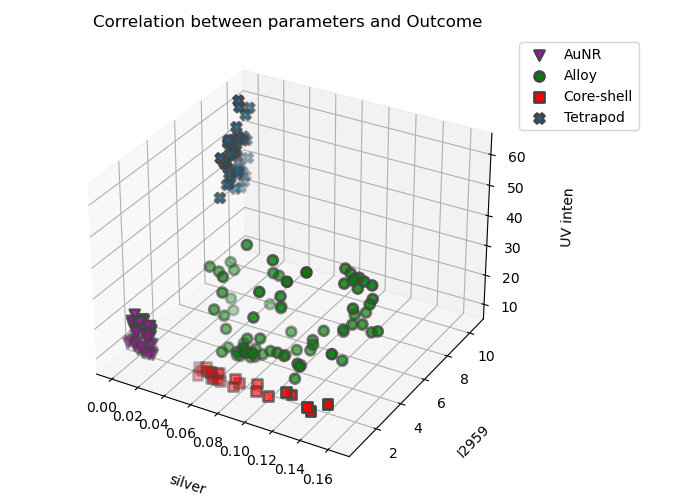

In [8]:
# Select three parameters and the outcome variable
# for creating a responsive plot
%matplotlib widget

# Select three parameters and the outcome variable for creating the plot
param1 = X['silver']
param2 = X['I-2959']
param3 = X['UV_Inten']
outcome = train_labels

# Create a 3D scatter plot
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')

# Define colors or markers for each category of the outcome
categories = train_labels.unique()
colors = ['m', 'g', 'r', '#0072BD']
markers = ['v', 'o', 's', 'X']

classes = {
    0:'Alloy',
    1:'Core-shell',
    2:'AuNR',
    3:'Tetrapod'
}

# Iterate over each category and plot the corresponding data points
for i, category in enumerate(categories):
    mask = (outcome == category)
    ax.scatter(param1[mask], param2[mask], param3[mask],s=50, c=colors[i], \
                   marker=markers[i], edgecolor='#444444', label= classes[category],linewidth=2)
    
# Set labels and title
ax.set_xlabel('silver', labelpad=15)
ax.set_ylabel('I2959', labelpad=15)
ax.set_zlabel('UV inten', labelpad=15, rotation=90)

# Set title for the plot
ax.set_title('Correlation between parameters and Outcome')

# Add a legend outside the plot area
fig.tight_layout()
fig.subplots_adjust(right=0.8)
ax.legend(loc="upper left", bbox_to_anchor=[1, 1])

# Show the interactive plot
plt.show()


# Chemical knowledge-driven 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
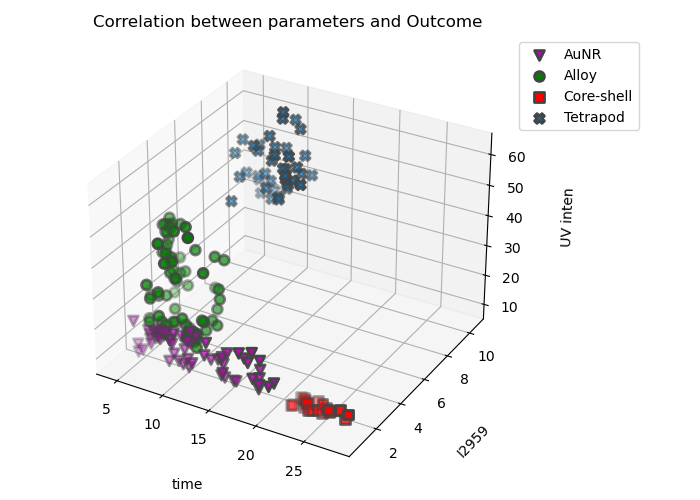

In [9]:
# Select three parameters and the outcome variable
# for creating a responsive plot
%matplotlib widget

# Select three parameters and the outcome variable for creating the plot
param1 = X['time']
param2 = X['I-2959']
param3 = X['UV_Inten']
outcome = train_labels

# Create a 3D scatter plot
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')

# Define colors or markers for each category of the outcome
categories = train_labels.unique()
colors = ['m', 'g', 'r', '#0072BD']
markers = ['v', 'o', 's', 'X']

classes = {
    0:'Alloy',
    1:'Core-shell',
    2:'AuNR',
    3:'Tetrapod'
}

# Iterate over each category and plot the corresponding data points
for i, category in enumerate(categories):
    mask = (outcome == category)
    ax.scatter(param1[mask], param2[mask], param3[mask],s=50, c=colors[i], \
                   marker=markers[i], edgecolor='#444444', label= classes[category],linewidth=2)
    
# Set labels and title
ax.set_xlabel('time', labelpad=15)
ax.set_ylabel('I2959', labelpad=15)
ax.set_zlabel('UV inten', labelpad=15, rotation=90)
ax.set_title('Correlation between parameters and Outcome')

# Add a legend
fig.tight_layout()
fig.subplots_adjust(right=0.8)
ax.legend(loc="upper left", bbox_to_anchor=[1, 1])

# Show the plot
plt.show()
